In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Explicitly specifying the dtype
_empty_series = pd.Series(dtype=float)


C:\Users\Arunangshu_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
start = '2015-01-01'
end = '2024-2-20'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,26.378078,26.490770,26.133251,26.168653,26.168653,28951268
1,2015-01-05,26.091366,26.144720,25.582764,25.623152,25.623152,41196796
2,2015-01-06,25.679497,25.738087,24.983908,25.029282,25.029282,57998800
3,2015-01-07,25.280592,25.292759,24.914099,24.986401,24.986401,41301082
4,2015-01-08,24.831326,25.105074,24.482782,25.065184,25.065184,67071641
...,...,...,...,...,...,...,...
2292,2024-02-12,149.539993,150.589996,148.559998,148.729996,148.729996,17236100
2293,2024-02-13,146.070007,148.039993,145.110001,146.369995,146.369995,18138500
2294,2024-02-14,147.369995,147.830002,145.554993,147.139999,147.139999,16651800
2295,2024-02-15,144.460007,144.759995,141.880005,143.940002,143.940002,26724300


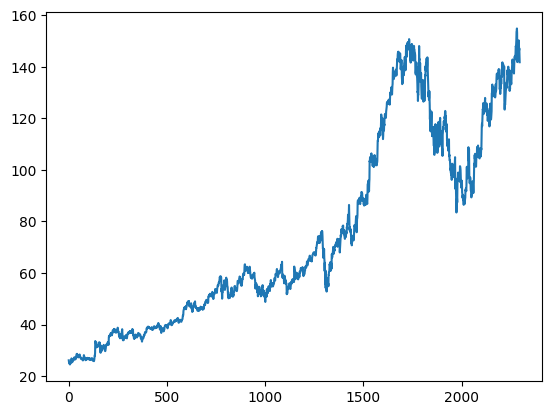

In [5]:
plt.plot(data.Close)

In [6]:
#MOVING AVERAGE
ma_100_days = data.Close.rolling(100).mean()
ma_100_days

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2292    138.2682
2293    138.3860
2294    138.5438
2295    138.6707
2296    138.7666
Name: Close, Length: 2297, dtype: float64

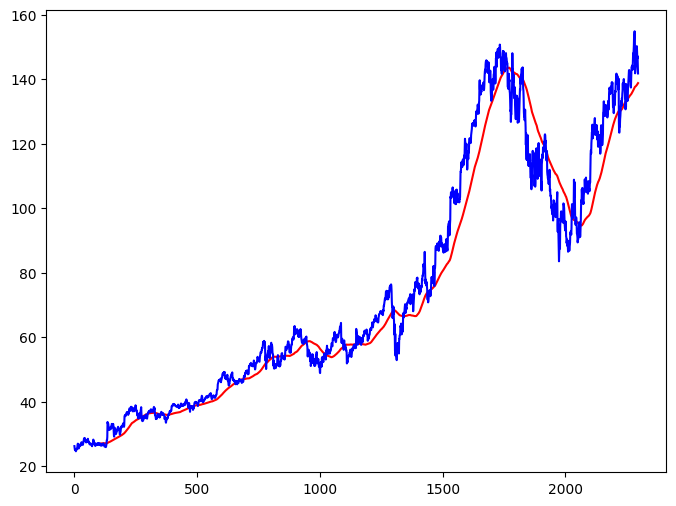

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'b')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()
ma_200_days

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2292    131.678875
2293    131.868875
2294    132.063475
2295    132.244625
2296    132.423525
Name: Close, Length: 2297, dtype: float64

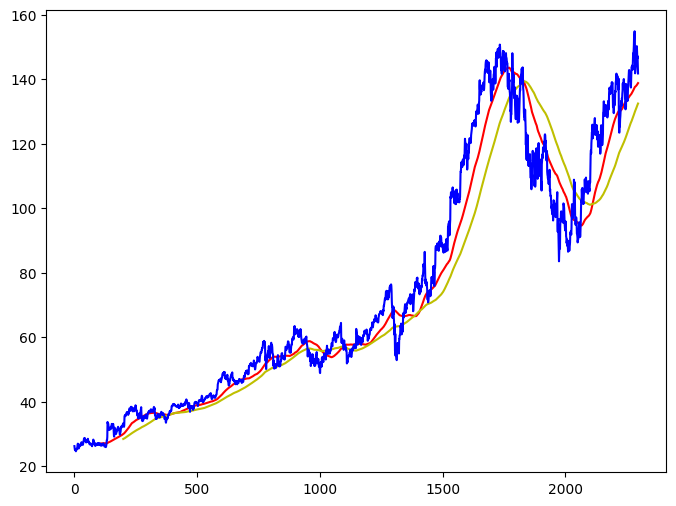

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'y')
plt.plot(data.Close,'b')
plt.show()

In [10]:
data.shape

(2297, 7)

In [11]:
data.dropna(inplace=True)

In [12]:
#splitting data into test and train

data_train = pd.DataFrame(data.Close[0: int(len(data)*0.70)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.70): len(data)])

print(data_train.shape)
print(data_test.shape)

(1607, 1)
(690, 1)


In [13]:
data_train.head()

,Close
0,26.168653
1,25.623152
2,25.029282
3,24.986401
4,25.065184


In [14]:
data_test.head()

,Close
1607,117.254997
1608,120.333504
1609,120.453499
1610,121.676498
1611,120.125504


In [15]:
data_train.shape[0]

1607

In [16]:
data_test.shape[0]

690

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_train_scale = scaler.fit_transform(data_train)
data_train_scale

array([[0.01659455],
       [0.01096702],
       [0.0048405 ],
       ...,
       [0.93477036],
       [0.93749385],
       [0.961933  ]])

In [19]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
x, y = np.array(x), np.array(y)  

In [20]:
x.shape

(1507, 100, 1)

In [21]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))
x.shape


(1507, 100, 1)

In [22]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [25]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [26]:
model.fit(x,y, epochs = 60, batch_size =32, verbose =1)

Epoch 1/60
48/48 [==============================] - 11s 146ms/step - loss: 0.0320
Epoch 2/60
48/48 [==============================] - 7s 140ms/step - loss: 0.0069
Epoch 3/60
48/48 [==============================] - 6s 128ms/step - loss: 0.0044
Epoch 4/60
48/48 [==============================] - 6s 134ms/step - loss: 0.0054
Epoch 5/60
48/48 [==============================] - 7s 142ms/step - loss: 0.0043
Epoch 6/60
48/48 [==============================] - 8s 156ms/step - loss: 0.0041
Epoch 7/60
48/48 [==============================] - 8s 166ms/step - loss: 0.0037
Epoch 8/60
48/48 [==============================] - 7s 149ms/step - loss: 0.0044
Epoch 9/60
48/48 [==============================] - 7s 142ms/step - loss: 0.0045
Epoch 10/60
48/48 [==============================] - 7s 153ms/step - loss: 0.0044
Epoch 11/60
48/48 [==============================] - 8s 158ms/step - loss: 0.0036
Epoch 12/60
48/48 [==============================] - 7s 149ms/step - loss: 0.0032
Epoch 13/60
48/48 [=====

In [27]:
pas_100_days = data_train.tail(100)

In [28]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [29]:
data_test.head()

,Close
0,88.804497
1,87.935997
2,86.975998
3,87.594002
4,86.412003


In [30]:
data_test_scale  =  scaler.fit_transform(data_test)
data_test_scale

array([[0.07448492],
       [0.06231253],
       [0.04885775],
       [0.05751933],
       [0.04095312],
       [0.04983882],
       [0.04589356],
       [0.08230561],
       [0.09629291],
       [0.06791872],
       [0.05378419],
       [0.05928526],
       [0.04932032],
       [0.04652423],
       [0.08483534],
       [0.1521374 ],
       [0.15518574],
       [0.16205326],
       [0.16089704],
       [0.17339877],
       [0.11281709],
       [0.13546608],
       [0.11628598],
       [0.16226348],
       [0.18059574],
       [0.28049761],
       [0.27510164],
       [0.30007013],
       [0.29650319],
       [0.28991593],
       [0.29823405],
       [0.29859152],
       [0.30435179],
       [0.31681855],
       [0.32131043],
       [0.31352492],
       [0.30227052],
       [0.27686063],
       [0.28105118],
       [0.29808692],
       [0.25337075],
       [0.25722502],
       [0.28851441],
       [0.28454103],
       [0.2501122 ],
       [0.26579539],
       [0.30745627],
       [0.248

In [31]:
data_test_scale.shape

(790, 1)

In [32]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [33]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [34]:
print(x.shape)
print(y.shape)

(690, 100, 1)
(690,)


In [35]:
#predictions
pred = model.predict(x)

22/22 [==============================] - 1s 43ms/step


In [36]:
pred.shape
pred

array([[0.45161057],
       [0.45049727],
       [0.45229638],
       [0.45694715],
       [0.4642504 ],
       [0.47323903],
       [0.48293328],
       [0.4927116 ],
       [0.5019875 ],
       [0.51010156],
       [0.5172397 ],
       [0.5238337 ],
       [0.53034914],
       [0.5370747 ],
       [0.5443859 ],
       [0.5522156 ],
       [0.56040335],
       [0.56855404],
       [0.5761546 ],
       [0.58298475],
       [0.5887153 ],
       [0.5934037 ],
       [0.5973331 ],
       [0.6005871 ],
       [0.60342306],
       [0.6059378 ],
       [0.60810685],
       [0.6096817 ],
       [0.6103369 ],
       [0.6102469 ],
       [0.6103077 ],
       [0.61142814],
       [0.6140866 ],
       [0.6180208 ],
       [0.6228025 ],
       [0.6282108 ],
       [0.63407946],
       [0.64043933],
       [0.64692676],
       [0.65328664],
       [0.65854645],
       [0.66259396],
       [0.6659831 ],
       [0.66936624],
       [0.6742337 ],
       [0.6817617 ],
       [0.69133747],
       [0.701

In [37]:
pred1=scaler.inverse_transform(pred)
pred1

array([[115.71241 ],
       [115.63298 ],
       [115.761345],
       [116.09317 ],
       [116.61426 ],
       [117.25561 ],
       [117.94729 ],
       [118.644966],
       [119.3068  ],
       [119.88574 ],
       [120.39505 ],
       [120.86553 ],
       [121.33041 ],
       [121.81028 ],
       [122.33193 ],
       [122.89058 ],
       [123.47478 ],
       [124.05633 ],
       [124.598625],
       [125.08595 ],
       [125.494835],
       [125.82935 ],
       [126.10971 ],
       [126.34189 ],
       [126.54423 ],
       [126.723656],
       [126.878426],
       [126.99079 ],
       [127.03754 ],
       [127.03111 ],
       [127.03545 ],
       [127.115395],
       [127.30508 ],
       [127.58578 ],
       [127.926956],
       [128.31284 ],
       [128.73157 ],
       [129.18533 ],
       [129.64822 ],
       [130.10199 ],
       [130.4773  ],
       [130.76608 ],
       [131.00789 ],
       [131.24928 ],
       [131.59657 ],
       [132.1337  ],
       [132.81693 ],
       [133.5

In [38]:
y

array([0.47323056, 0.51637711, 0.51805889, 0.53519974, 0.5134619 ,
       0.51980387, 0.53259291, 0.52661536, 0.51493346, 0.54797478,
       0.55801682, 0.56976181, 0.57575337, 0.59691668, 0.59154178,
       0.60072881, 0.59625789, 0.59154178, 0.60099517, 0.58973371,
       0.60217246, 0.60980378, 0.60226356, 0.61376315, 0.6097408 ,
       0.60728111, 0.59605472, 0.5862089 , 0.6009601 , 0.63390325,
       0.6486475 , 0.65294327, 0.64032243, 0.64589343, 0.65976172,
       0.66579551, 0.68104425, 0.66960754, 0.67772261, 0.64140155,
       0.66729509, 0.6883041 , 0.69850749, 0.76140151, 0.78702879,
       0.74711278, 0.74129648, 0.74352488, 0.72503148, 0.73580246,
       0.73987389, 0.73634908, 0.74912412, 0.7504695 , 0.76400844,
       0.76533286, 0.75962862, 0.76943937, 0.76967077, 0.77681855,
       0.75417673, 0.74393848, 0.74875264, 0.77010511, 0.80742125,
       0.82562722, 0.8333567 , 0.82176601, 0.85578851, 0.86866855,
       0.86856355, 0.87388926, 0.85114222, 0.85893479, 0.86936

In [39]:
scale =1/scaler.scale_
pred = pred*scale
y = y*scale

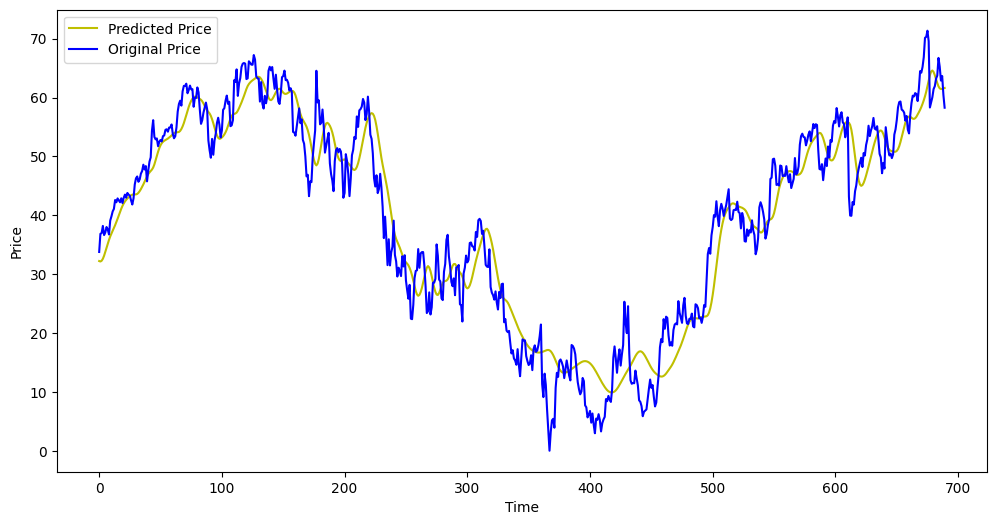

In [40]:
plt.figure(figsize=(12,6))
plt.plot(pred, 'y', label = 'Predicted Price')
plt.plot(y, 'b', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [41]:
#future stock Price

In [42]:
future_days = 30
predicted_prices = []

# Take the last 100 days from the training data as a starting point for prediction
last_100_days = data_test_scale[-100:].reshape(1, -1)

for i in range(future_days):
    # Reshape the last 100 days data for prediction
    input_data = last_100_days.reshape((1, 100, 1))
    # Predict the next day's price
    prediction = model.predict(input_data)
    # Append the prediction to the list
    predicted_prices.append(prediction[0,0])
    # Update the last_100_days array for the next iteration
    last_100_days = np.append(last_100_days[:,1:], prediction, axis=1)



1/1 [==============================] - 0s 27ms/step


In [43]:
predicted_prices = np.array(predicted_prices)
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1,1))

In [44]:
predicted_prices

array([[145.03215],
       [144.8398 ],
       [144.5915 ],
       [144.32925],
       [144.07819],
       [143.84904],
       [143.64331],
       [143.45784],
       [143.2879 ],
       [143.1292 ],
       [142.97842],
       [142.83337],
       [142.69283],
       [142.55608],
       [142.42284],
       [142.29298],
       [142.16644],
       [142.04315],
       [141.92302],
       [141.80595],
       [141.69185],
       [141.58055],
       [141.47198],
       [141.36601],
       [141.26257],
       [141.16153],
       [141.06284],
       [140.96643],
       [140.87221],
       [140.78014]], dtype=float32)

In [45]:
model.save('Stock Predictions Model.keras')